In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\PKumar\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
data = pd.read_csv(r'C:\Users\PKumar\PycharmProjects\MLpractice\Banking.csv.txt', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [17]:
print(data.head())

   age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu ...         1    999         0  nonexistent   
1  cellular   nov         fri ...         1    999         0  nonexistent   
2  cellular   jun         thu ...         3      6         2      success   
3  cellular   apr         fri ...         2    999         0  nonexistent   
4  cellular   aug         fri ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4         

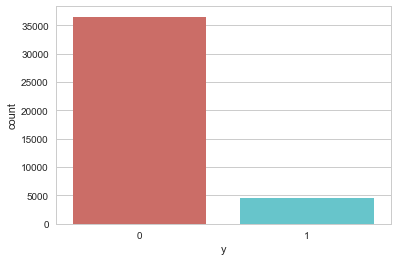

In [18]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [19]:
print(data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


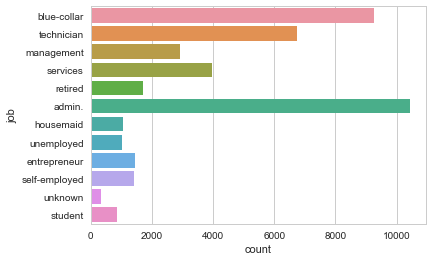

In [20]:
sns.countplot(y="job", data=data)
plt.show()

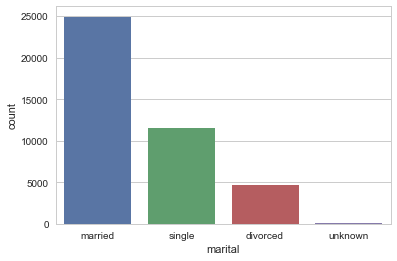

In [21]:
sns.countplot(x="marital", data=data)
plt.show()

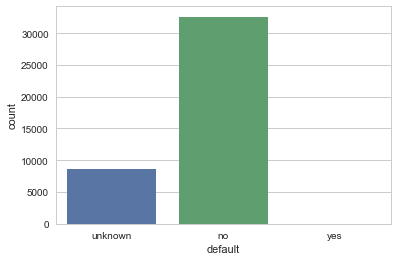

In [22]:
sns.countplot(x="default", data=data)
plt.show()

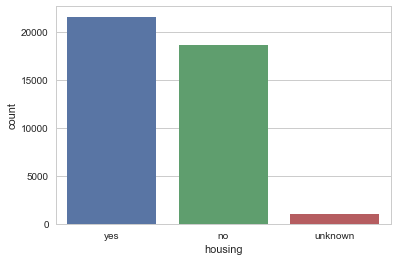

In [23]:
sns.countplot(x="housing", data=data)
plt.show()

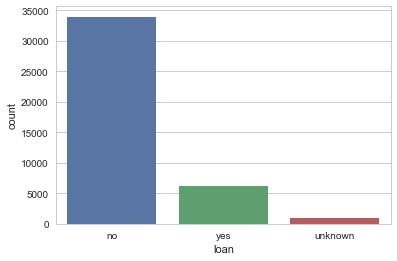

In [24]:
sns.countplot(x="loan", data=data)
plt.show()

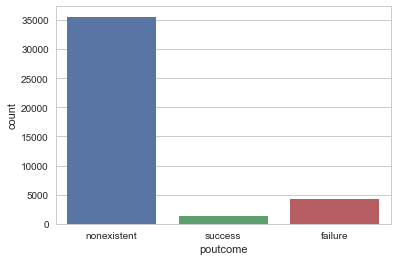

In [25]:

sns.countplot(x="poutcome", data=data)
plt.show()

In [26]:
data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)
print(data.head())

           job  marital  default housing loan     poutcome  y
0  blue-collar  married  unknown     yes   no  nonexistent  0
1   technician  married       no      no   no  nonexistent  0
2   management   single       no     yes   no      success  1
3     services  married       no      no   no  nonexistent  0
4      retired  married       no     yes   no      success  1


In [27]:
data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [41]:
data2.drop(data2.columns[[12, 16, 18, 21, 23]], axis=1, inplace=True)
#print(data2.columns[[12,16,18,21]])
#print(data2.columns)
print(data2.head())

   y  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0  0           0                1                 0              0   
1  0           0                0                 0              0   
2  1           0                0                 0              0   
3  0           0                0                 0              0   
4  1           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                  0             0            0   
2               1            0                  0             0            0   
3               0            0                  0             1            0   
4               0            1                  0             0            0   

   job_technician  job_unemployed  marital_married  marital_single  \
0               0           

In [43]:
print(data2.columns)

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'default_no', 'housing_no',
       'loan_no', 'loan_yes', 'poutcome_nonexistent'],
      dtype='object')


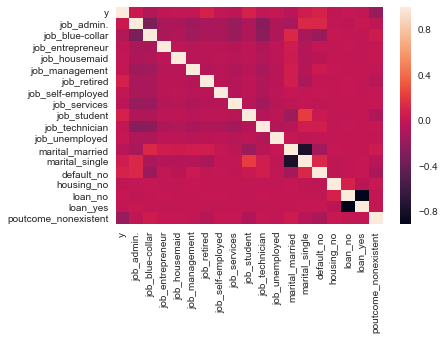

In [44]:

sns.heatmap(data2.corr())
plt.show()

In [45]:
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [46]:
X_train.shape

(30891, 18)

In [47]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9121   35]
 [1110   31]]


In [49]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94      9156
          1       0.47      0.03      0.05      1141

avg / total       0.84      0.89      0.84     10297



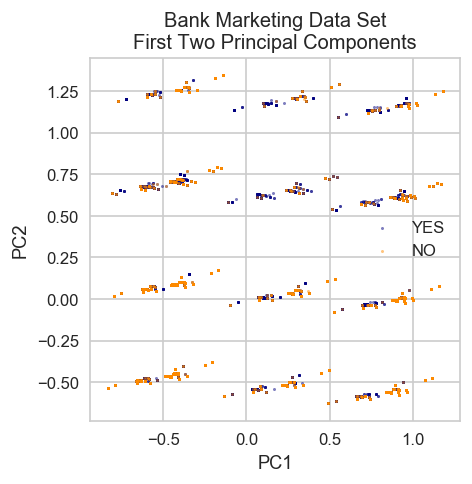

In [51]:
from sklearn.decomposition import PCA

X = data2.iloc[:,1:]
y = data2.iloc[:,0]


pca = PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)


plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('Bank Marketing Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

In [52]:
def plot_bank(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.8, label='YES', s=5, color='navy')
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.8, label='NO', s=5, color='darkorange')
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.legend()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

In [54]:
model = LogisticRegression()
model.fit(X_train,y_train)

plot_bank(X_test, y_test, model)
plt.show()